In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fighter_details = pd.read_csv("raw_fighter_details.csv")

df = pd.read_csv("raw_total_fight_data.csv", sep = ';')

In [6]:
df.head(2)

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR.,B_SIG_STR.,R_SIG_STR_pct,B_SIG_STR_pct,R_TOTAL_STR.,B_TOTAL_STR.,...,B_GROUND,win_by,last_round,last_round_time,Format,Referee,date,location,Fight_type,Winner
0,Henry Cejudo,Marlon Moraes,0,0,90 of 171,57 of 119,52%,47%,99 of 182,59 of 121,...,1 of 1,KO/TKO,3,4:51,5 Rnd (5-5-5-5-5),Marc Goddard,"June 08, 2019","Chicago, Illinois, USA",UFC Bantamweight Title Bout,Henry Cejudo
1,Valentina Shevchenko,Jessica Eye,1,0,8 of 11,2 of 12,72%,16%,37 of 40,42 of 52,...,0 of 0,KO/TKO,2,0:26,5 Rnd (5-5-5-5-5),Robert Madrigal,"June 08, 2019","Chicago, Illinois, USA",UFC Women's Flyweight Title Bout,Valentina Shevchenko


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 41 columns):
R_fighter          5144 non-null object
B_fighter          5144 non-null object
R_KD               5144 non-null int64
B_KD               5144 non-null int64
R_SIG_STR.         5144 non-null object
B_SIG_STR.         5144 non-null object
R_SIG_STR_pct      5144 non-null object
B_SIG_STR_pct      5144 non-null object
R_TOTAL_STR.       5144 non-null object
B_TOTAL_STR.       5144 non-null object
R_TD               5144 non-null object
B_TD               5144 non-null object
R_TD_pct           5144 non-null object
B_TD_pct           5144 non-null object
R_SUB_ATT          5144 non-null int64
B_SUB_ATT          5144 non-null int64
R_PASS             5144 non-null int64
B_PASS             5144 non-null int64
R_REV              5144 non-null int64
B_REV              5144 non-null int64
R_HEAD             5144 non-null object
B_HEAD             5144 non-null object
R_BODY             51

In [7]:
df.columns

Index(['R_fighter', 'B_fighter', 'R_KD', 'B_KD', 'R_SIG_STR.', 'B_SIG_STR.',
       'R_SIG_STR_pct', 'B_SIG_STR_pct', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_TD_pct', 'B_TD_pct', 'R_SUB_ATT', 'B_SUB_ATT',
       'R_PASS', 'B_PASS', 'R_REV', 'B_REV', 'R_HEAD', 'B_HEAD', 'R_BODY',
       'B_BODY', 'R_LEG', 'B_LEG', 'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH',
       'B_CLINCH', 'R_GROUND', 'B_GROUND', 'win_by', 'last_round',
       'last_round_time', 'Format', 'Referee', 'date', 'location',
       'Fight_type', 'Winner'],
      dtype='object')

In [8]:
columns = ['R_SIG_STR.', 'B_SIG_STR.', 'R_TOTAL_STR.', 'B_TOTAL_STR.',
       'R_TD', 'B_TD', 'R_HEAD', 'B_HEAD', 'R_BODY','B_BODY', 'R_LEG', 'B_LEG', 
        'R_DISTANCE', 'B_DISTANCE', 'R_CLINCH','B_CLINCH', 'R_GROUND', 'B_GROUND']

In [10]:
attemp = '_att'
landed = '_landed'

for column in columns:
    df[column + attemp] = df[column].apply(lambda X: int(X.split('of')[1]))
    df[column + landed] = df[column].apply(lambda X: int(X.split('of')[0]))
    
df.drop(columns, axis = 1, inplace = True)

In [11]:
df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,B_DISTANCE_att,B_DISTANCE_landed,R_CLINCH_att,R_CLINCH_landed,B_CLINCH_att,B_CLINCH_landed,R_GROUND_att,R_GROUND_landed,B_GROUND_att,B_GROUND_landed
0,Henry Cejudo,Marlon Moraes,0,0,52%,47%,25%,0%,1,0,...,116,54,23,19,2,2,30,26,1,1
1,Valentina Shevchenko,Jessica Eye,1,0,72%,16%,100%,0%,1,0,...,12,2,2,2,0,0,1,1,0,0
2,Tony Ferguson,Donald Cerrone,0,0,52%,36%,0%,100%,0,0,...,184,68,2,1,1,0,0,0,0,0
3,Jimmie Rivera,Petr Yan,0,2,38%,29%,0%,33%,0,0,...,167,42,15,9,12,10,4,4,10,4
4,Tai Tuivasa,Blagoy Ivanov,0,1,44%,59%,0%,100%,0,0,...,111,62,18,14,6,5,0,0,6,6


In [12]:
#Make The Percentage to Fraction

pct_columns = ['R_SIG_STR_pct','B_SIG_STR_pct', 'R_TD_pct', 'B_TD_pct']

for column in pct_columns:
    df[column] = df[column].apply(lambda X: float(X.replace('%', ''))/100)

In [13]:
#Get Fighter Division

def Division(X):
    for Division in weight_classes:
        if Division in X:
            return Division
    if X == 'Catch Weight Bout' or 'Catchweight Bout':
        return 'Catch Weight'
    else:
        return 'Open Weight'

In [14]:
weight_classes = ['Women\'s Strawweight', 'Women\'s Bantamweight', 
                  'Women\'s Featherweight', 'Women\'s Flyweight', 'Lightweight', 
                  'Welterweight', 'Middleweight','Light Heavyweight', 
                  'Heavyweight', 'Featherweight','Bantamweight', 'Flyweight', 'Open Weight']

df['weight_class'] = df['Fight_type'].apply(Division)

In [15]:
df['weight_class'].value_counts()

Lightweight              989
Welterweight             969
Middleweight             725
Heavyweight              507
Light Heavyweight        502
Featherweight            442
Bantamweight             379
Flyweight                187
Women's Strawweight      143
Women's Bantamweight     111
Open Weight               92
Women's Flyweight         50
Catch Weight              38
Women's Featherweight     10
Name: weight_class, dtype: int64

In [ ]:
# Number of Round

In [16]:
def get_rounds(X):
    if X == 'No Time Limit':
        return 1
    else:
        return len(X.split('(')[1].replace(')', '').split('-'))

df['no_of_rounds'] = df['Format'].apply(get_rounds)

In [17]:
# Replace Winner Name with R/B

df['Winner'].isnull().sum()

83

In [18]:
#fill the null value with draw

df['Winner'].fillna('Draw', inplace=True) 

In [ ]:
def get_renamed_winner(row):
    if row['R_fighter'] == row['Winner']:
        return 'Red'
    elif row['B_fighter'] == row['Winner']:
        return 'Blue'
    elif row['Winner'] == 'Draw':
        return 'Draw'

df['Winner'] = df[['R_fighter', 'B_fighter', 'Winner']].apply(get_renamed_winner, axis=1)

In [19]:
df['Winner'].value_counts()

Draw                 83
Donald Cerrone       23
Michael Bisping      20
Georges St-Pierre    20
Demian Maia          20
                     ..
Mike Ciesnolevicz     1
Rafael Carino         1
Matt Hobar            1
Hannah Cifers         1
Rachael Ostovich      1
Name: Winner, Length: 1268, dtype: int64

# Deal with fighter details data

In [20]:
# Inch to CM

def convert_to_cms(X):
    if X is np.NaN:
        return X
    elif len(X.split("'")) == 2:
        feet = float(X.split("'")[0])
        inches = int(X.split("'")[1].replace(' ', '').replace('"',''))
        return (feet * 30.48) + (inches * 2.54)
    else:
        return float(X.replace('"','')) * 2.54

In [21]:
fighter_details['Height'] = fighter_details['Height'].apply(convert_to_cms)
fighter_details['Reach'] = fighter_details['Reach'].apply(convert_to_cms)

In [22]:
fighter_details['Weight'] = fighter_details['Weight'].apply(lambda X: float(X.replace(' lbs.', '')) if X is not np.NaN else X)

In [23]:
fighter_details.head()

,fighter_name,Height,Weight,Reach,Stance,DOB
0,AJ Fonseca,162.56,145.0,NaN,NaN,NaN
1,AJ Matthews,180.34,185.0,NaN,NaN,NaN
2,AJ McKee,177.80,145.0,NaN,NaN,NaN
3,AJ Siscoe,170.18,135.0,NaN,NaN,NaN
4,Aalon Cruz,182.88,145.0,NaN,NaN,NaN


In [24]:
# Merger Fighter Data with Match Data

new = df.merge(fighter_details, left_on='R_fighter', right_on='fighter_name', how='left')

In [25]:
new = new.drop('fighter_name', axis=1)

In [26]:
new.rename(columns={'Height':'R_Height',
                          'Weight':'R_Weight',
                          'Reach':'R_Reach',
                          'Stance':'R_Stance',
                          'DOB':'R_DOB'}, 
                 inplace=True)

In [27]:
new = new.merge(fighter_details, left_on='B_fighter', right_on='fighter_name', how='left')

In [28]:
new = new.drop('fighter_name', axis=1)

In [29]:
new.rename(columns={'Height':'B_Height',
                          'Weight':'B_Weight',
                          'Reach':'B_Reach',
                          'Stance':'B_Stance',
                          'DOB':'B_DOB'}, 
                 inplace=True)

In [30]:
new.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,R_Height,R_Weight,R_Reach,R_Stance,R_DOB,B_Height,B_Weight,B_Reach,B_Stance,B_DOB
0,Henry Cejudo,Marlon Moraes,0,0,0.52,0.47,0.25,0.00,1,0,...,162.56,135.0,162.56,Orthodox,"Feb 09, 1987",167.64,135.0,170.18,Orthodox,"Apr 26, 1988"
1,Valentina Shevchenko,Jessica Eye,1,0,0.72,0.16,1.00,0.00,1,0,...,165.10,125.0,167.64,Southpaw,"Mar 07, 1988",167.64,125.0,167.64,Orthodox,"Jul 27, 1986"
2,Tony Ferguson,Donald Cerrone,0,0,0.52,0.36,0.00,1.00,0,0,...,180.34,155.0,193.04,Orthodox,"Feb 12, 1984",185.42,155.0,185.42,Orthodox,"Mar 29, 1983"
3,Jimmie Rivera,Petr Yan,0,2,0.38,0.29,0.00,0.33,0,0,...,162.56,135.0,172.72,Orthodox,"Jun 29, 1989",170.18,135.0,170.18,Switch,"Feb 11, 1993"
4,Tai Tuivasa,Blagoy Ivanov,0,1,0.44,0.59,0.00,1.00,0,0,...,187.96,264.0,190.50,Southpaw,"Mar 16, 1993",180.34,250.0,185.42,Southpaw,"Oct 09, 1986"


In [31]:
# Get Age

new['R_DOB'] = pd.to_datetime(new['R_DOB'])
new['B_DOB'] = pd.to_datetime(new['B_DOB'])
new['date'] = pd.to_datetime(new['date'])

In [32]:
new['R_year'] = new['R_DOB'].apply(lambda x: x.year)
new['B_year'] = new['B_DOB'].apply(lambda x: x.year)
new['date_year'] = new['date'].apply(lambda x: x.year)

In [34]:
def get_age(row):
    B_age = (row['date_year'] - row['B_year'])
    R_age = (row['date_year'] - row['R_year'])
    if np.isnan(B_age) != True:
        B_age = B_age
    if np.isnan(R_age) != True:
        R_age = R_age
    return pd.Series([B_age, R_age], index=['B_age', 'R_age'])

In [35]:
new[['B_age', 'R_age']] = new[['date_year', 'R_year', 'B_year']].apply(get_age, axis = 1)

In [36]:
new.drop(['R_DOB', 'B_DOB','date_year','R_year','B_year'], axis = 1, inplace = True)

In [37]:
# Fighter Country

new['country'] = new['location'].apply(lambda x : x.split(',')[-1])

# EDA & Visualization

In [38]:
new['date_year'] = new['date'].apply(lambda x: x.year)

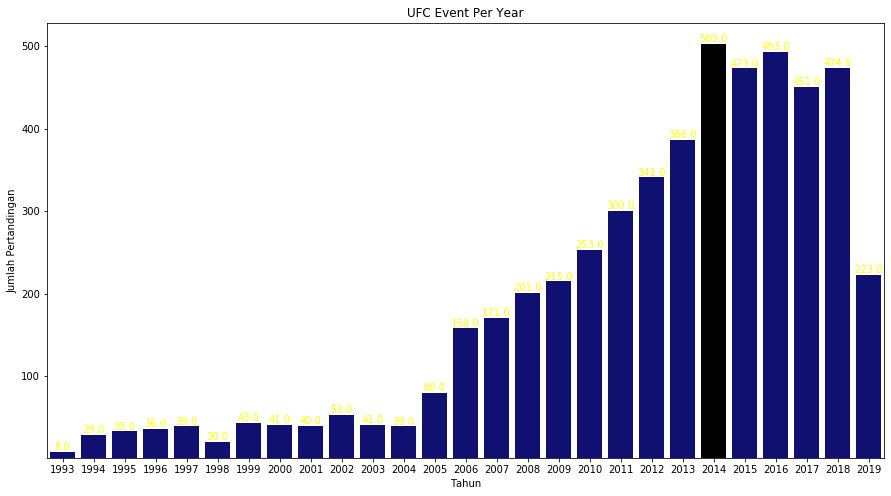

In [41]:
values = new['date_year'].sort_values(ascending = False).value_counts().sort_index()
labels = values.index

clrs = ['navy' if (y < max(values)) else 'black' for y in values ]

plt.figure(figsize = (15,8))
bar = sns.barplot(x = labels, y = values, palette = clrs)


ax = plt.gca()
y_max = values.max() 
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
        fontsize = 10, color = 'black', ha = 'center', va = 'bottom')
    
plt.xlabel('Tahun')
plt.ylabel('Jumlah Pertandingan')
plt.title('UFC Event Per Year')
plt.show()

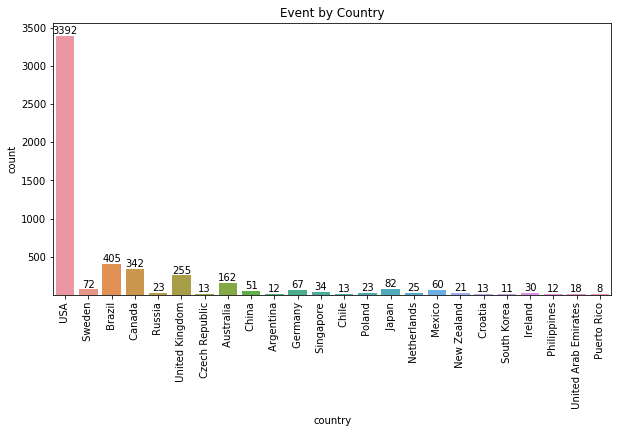

In [42]:
plt.figure(figsize = (10,5))
bar = sns.countplot(new['country'])
plt.xticks(rotation = 90)
ax = plt.gca()
y_max = new['country'].value_counts().max() 
ax.set_ylim(1)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), p.get_height(), 
        fontsize = 10, color = 'black', ha = 'center', va = 'bottom')

plt.title('Event by Country')    
plt.show()

In [43]:
women = new.weight_class.str.contains('Women')

In [44]:
women1 = len(new[women])
men = (len(new['weight_class'])) - len(new[women])

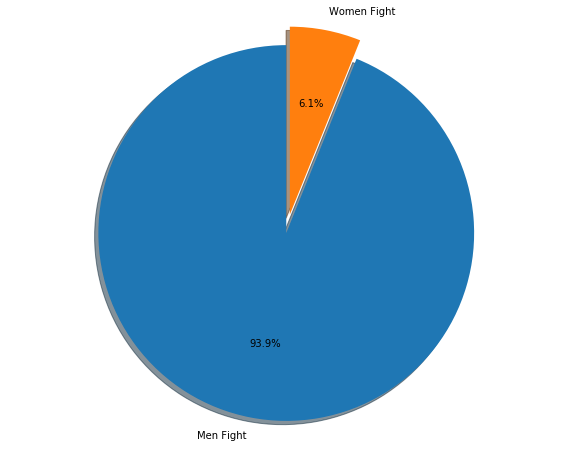

In [45]:
labels = 'Men Fight', 'Women Fight'
sizes = [men,women1]
explode = (0, 0.1,)  

fig1, ax1 = plt.subplots(figsize = (10,8))
ax1.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90 )
ax1.axis('equal') 

plt.show()

In [52]:
new['R_age'] = new['R_age'].fillna(new['R_age'].median())

In [53]:
new['B_age'] = new['B_age'].fillna(new['B_age'].median())

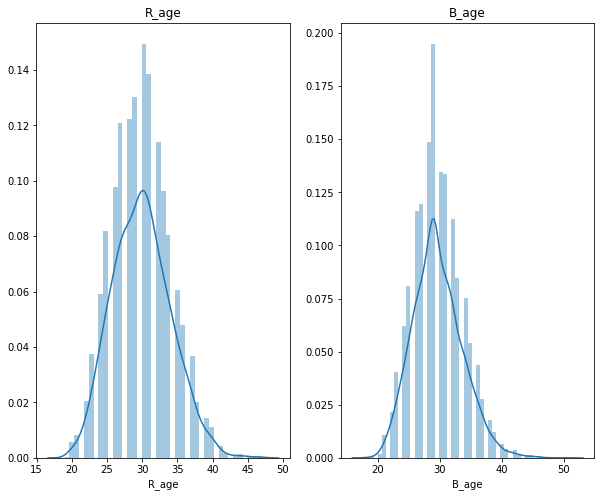

In [54]:
f, ax = plt.subplots(1, 2, figsize = (10,8))
sns.distplot(new['R_age'], ax = ax[0])

ax[0].set_title('R_age')
ax[0].set_ylabel('')
hist = sns.distplot(new['B_age'], ax = ax[1])

ax[1].set_title('B_age')
plt.show()

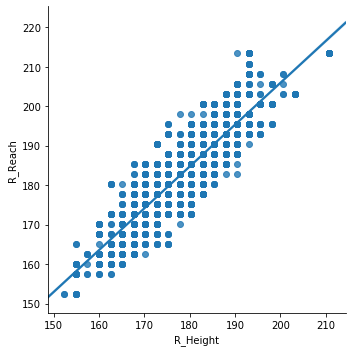

In [58]:
# Then Now lets see how Height can affect the match

sns.lmplot(x='R_Height', y='R_Reach', data=new)
plt.show()


In [59]:
new['R_Height'] = new['R_Height'].fillna(new['R_Height'].mean())

new['B_Height'] = new['B_Height'].fillna(new['R_age'].mean())

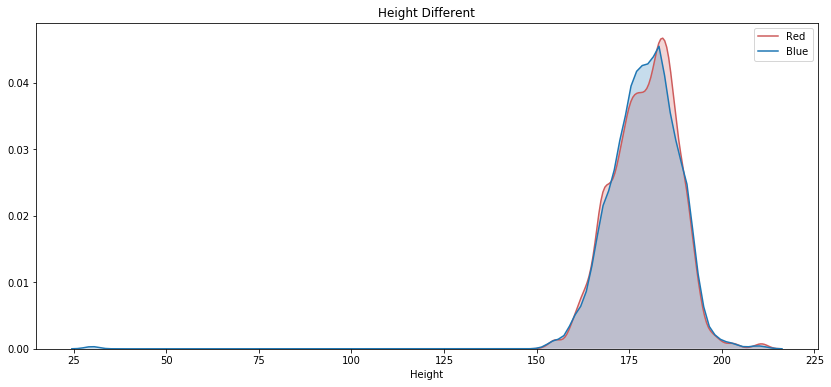

In [60]:
fig, ax = plt.subplots(figsize = (14, 6))
sns.kdeplot(new.R_Height, shade = True, color = 'indianred', label = 'Red')
sns.kdeplot(new.B_Height, shade = True, label = 'Blue')
plt.xlabel('Height')
plt.title('Height Different')

plt.show()

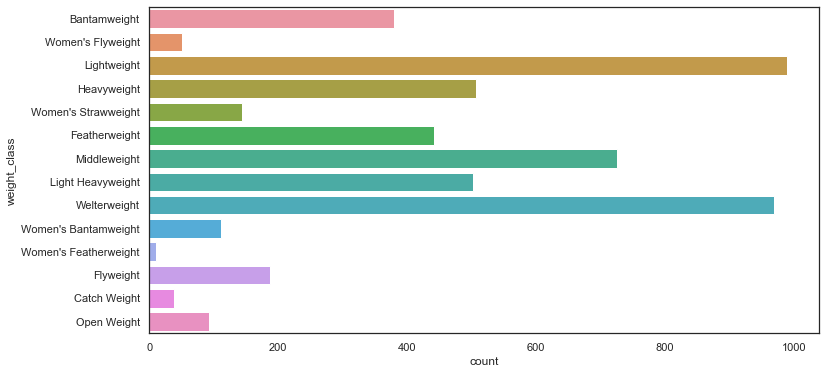

In [65]:
plt.figure(figsize = (12, 6))
sns.countplot(y = new['weight_class'])

sns.set()
sns.set(style = "white")
plt.show()

# How the win happened ?

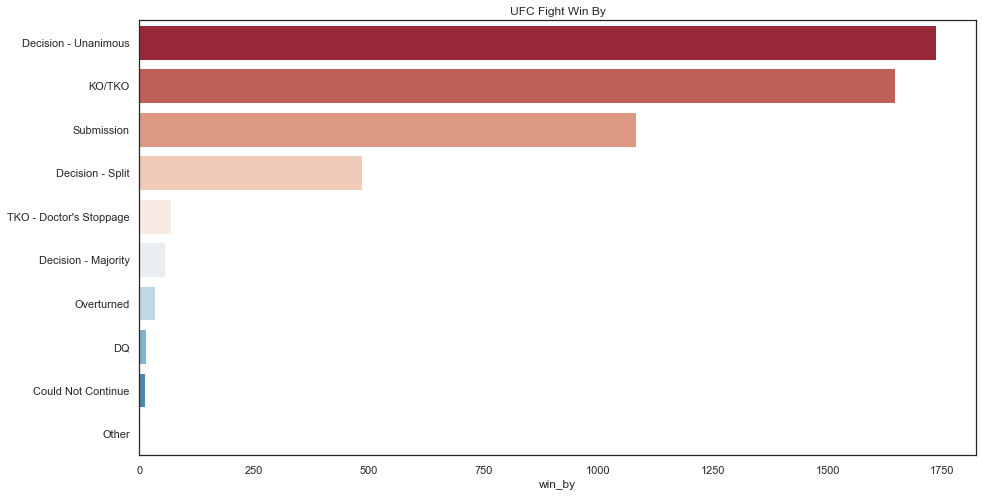

In [66]:
values = new['win_by'].value_counts()
labels = values.index

plt.figure(figsize = (15,8))

sns.barplot(x = values, y = labels, palette = 'RdBu')

plt.title('UFC Fight Win By')
plt.show()

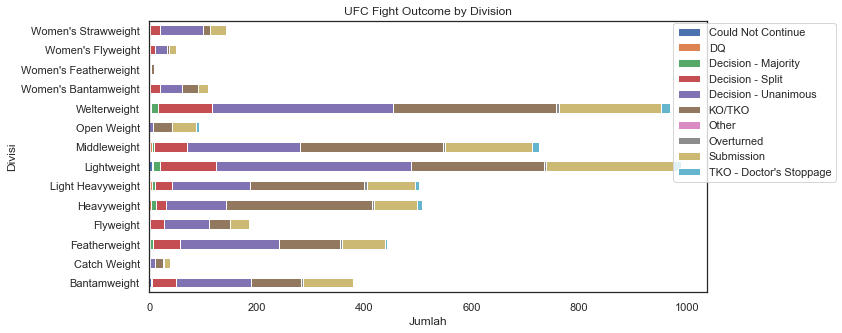

In [69]:
bar = new.groupby(['weight_class', 'win_by']).size().reset_index().pivot(columns = 'win_by', index = 'weight_class', values = 0)
bar.plot(kind = 'barh', stacked = True, figsize = (10, 5))
plt.legend(bbox_to_anchor = (1.23, 0.99), loc = 1, borderaxespad = 0.)
plt.title('UFC Fight Outcome by Division')
plt.xlabel('Jumlah')
plt.ylabel('Divisi')
plt.show()

In [ ]:
# on heavy division the match was mainly ended by TKO



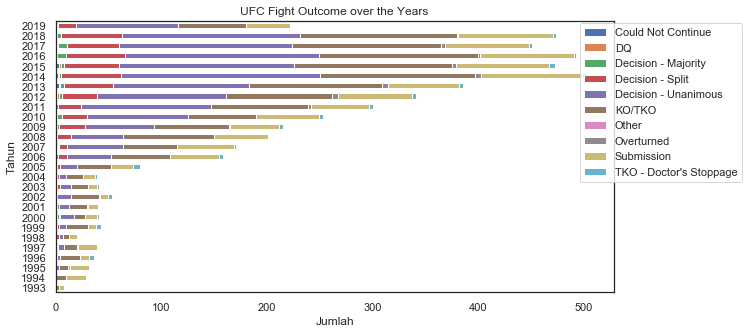

In [70]:
bar = new.groupby(['date_year', 'win_by']).size().reset_index().pivot(columns='win_by', index='date_year', values=0)
bar.plot(kind = 'barh', stacked = True, figsize = (10, 5))
plt.legend(bbox_to_anchor = (1.23, 0.99), loc = 1, borderaxespad = 0.)
plt.title('UFC Fight Outcome over the Years')
plt.xlabel('Jumlah')
plt.ylabel('Tahun')
plt.show()

In [72]:
Attempt = pd.concat([new['R_TOTAL_STR._att'], new['B_TOTAL_STR._att']], ignore_index=True)
Landed = pd.concat([new['R_TOTAL_STR._landed'], new['B_TOTAL_STR._landed']], ignore_index=True)

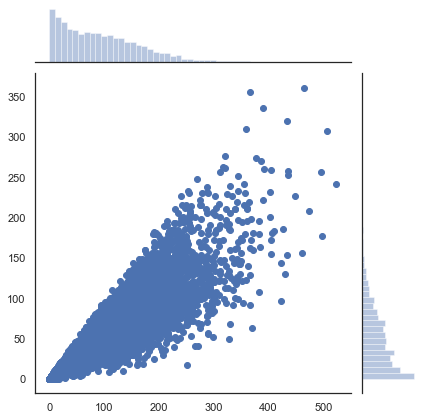

In [73]:
sns.jointplot(x = Attempt , y = Landed)
plt.show()

In [74]:
#The Higher Strike Attemp The Landed Strike tend to get higher as well

r_landed = new['R_TOTAL_STR._landed']
r_index = r_landed.index

In [75]:
b_landed = new['B_TOTAL_STR._landed']
b_index = b_landed.index

In [76]:
new['Winner'].head(9)

0            Henry Cejudo
1    Valentina Shevchenko
2           Tony Ferguson
3                Petr Yan
4           Blagoy Ivanov
5          Tatiana Suarez
6       Aljamain Sterling
7            Alexa Grasso
8           Calvin Kattar
Name: Winner, dtype: object

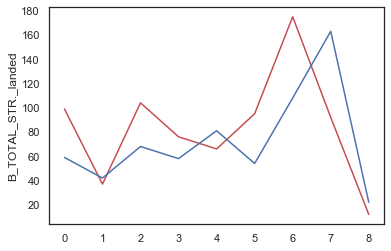

In [78]:
sns.lineplot(x = r_index[0:9], y = r_landed[0:9], color = 'r')
sns.lineplot(x = b_index[0:9], y = b_landed[0:9])
plt.show()

In [79]:
Fighter = pd.concat([new['R_fighter'], new['B_fighter']], ignore_index = True)

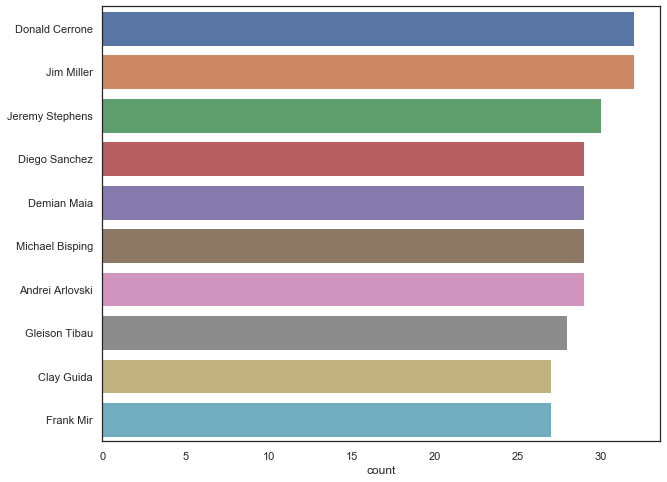

In [80]:
plt.figure(figsize = (10,8))
sns.countplot(y = Fighter, order = pd.value_counts(Fighter).iloc[:10].index)
plt.show()

# UFC Prediction

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, RandomizedSearchCV
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [83]:
#Deal with null Values

df = new.copy()

df.isnull().sum()

R_fighter          0
B_fighter          0
R_KD               0
B_KD               0
R_SIG_STR_pct      0
                ... 
B_Stance         159
B_age              0
R_age              0
country            0
date_year          0
Length: 73, dtype: int64

In [84]:
df = df.fillna(df.mean())

In [85]:
from statistics import mode 
df['B_Stance'] = df['B_Stance'].fillna(df['B_Stance'].mode()[0])
df['R_Stance'] = df['R_Stance'].fillna(df['R_Stance'].mode()[0])

In [87]:
# Data Encoding

enc = LabelEncoder()

data_enc1 = df['weight_class']
data_enc1 = enc.fit_transform(data_enc1)

data_enc2 = df['R_Stance']
data_enc2 = enc.fit_transform(data_enc2)

data_enc3 = df['B_Stance']
data_enc3= enc.fit_transform(data_enc3)

data_enc1 = pd.DataFrame(data_enc1, columns = ['weight_class'])
data_enc2 = pd.DataFrame(data_enc2, columns = ['R_Stance'])
data_enc3 = pd.DataFrame(data_enc3, columns = ['B_Stance'])

In [88]:
df[['weight_class']] = data_enc1[['weight_class']]
df[['R_Stance']] = data_enc2[['R_Stance']]
df[['B_Stance']] = data_enc3[['B_Stance']]

In [89]:
df = pd.concat([df, pd.get_dummies(df['win_by'], prefix = 'win_by')], axis = 1)
df.drop(['win_by'], axis = 1, inplace = True)

In [91]:
df['Winner_num'] = df.Winner.map({'Red':0,'Blue':1,'Draw':2})

df.head()

,R_fighter,B_fighter,R_KD,B_KD,R_SIG_STR_pct,B_SIG_STR_pct,R_TD_pct,B_TD_pct,R_SUB_ATT,B_SUB_ATT,...,win_by_DQ,win_by_Decision - Majority,win_by_Decision - Split,win_by_Decision - Unanimous,win_by_KO/TKO,win_by_Other,win_by_Overturned,win_by_Submission,win_by_TKO - Doctor's Stoppage,Winner_num
0,Henry Cejudo,Marlon Moraes,0,0,0.52,0.47,0.25,0.00,1,0,...,0,0,0,0,1,0,0,0,0,NaN
1,Valentina Shevchenko,Jessica Eye,1,0,0.72,0.16,1.00,0.00,1,0,...,0,0,0,0,1,0,0,0,0,NaN
2,Tony Ferguson,Donald Cerrone,0,0,0.52,0.36,0.00,1.00,0,0,...,0,0,0,0,0,0,0,0,1,NaN
3,Jimmie Rivera,Petr Yan,0,2,0.38,0.29,0.00,0.33,0,0,...,0,0,0,1,0,0,0,0,0,NaN
4,Tai Tuivasa,Blagoy Ivanov,0,1,0.44,0.59,0.00,1.00,0,0,...,0,0,0,1,0,0,0,0,0,NaN


In [92]:
encode = df[['R_fighter','B_fighter','weight_class']].apply(enc.fit_transform)
encode.head()

,R_fighter,B_fighter,weight_class
0,473,1129,0
1,1273,776,12
2,1252,472,6
3,581,1337,0
4,1202,175,4


In [93]:
df[['R_fighter','B_fighter','weight_class']] = encode[['R_fighter','B_fighter','weight_class']]

In [94]:
df = df.dropna()
sum(df.isnull().sum())

0

In [96]:
# Normalize data with Standard Scaler

numerical = df.drop(['R_fighter','B_fighter','weight_class','no_of_rounds','Winner_num'], axis=1)

In [97]:
std = StandardScaler()
df_num = numerical.select_dtypes(include=[np.float, np.int])

In [98]:
numerical[list(df_num.columns)] = std.fit_transform(numerical[list(df_num.columns)])

In [99]:
df_fix = numerical.join(df[['R_fighter','B_fighter','weight_class','no_of_rounds','Winner_num']])

In [100]:
# Drop Unecessary Column

df_fix = df_fix.drop(['country','location','date_year','date','Referee','Format','last_round_time','Fight_type','Winner'], axis=1)

# Modeling XGBoost

In [101]:
model = XGBClassifier()

In [102]:
X = df_fix.drop(['Winner_num'], axis=1)
y = df_fix['Winner_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [103]:
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [104]:
pred = model.predict(X_test)

In [105]:
Score = model.score(X_test, y_test)
print("Score: %.2f%%" % (Score * 100.0))

Score: 100.00%


In [107]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from itertools import cycle
lw = 1

In [108]:
X1 = df_fix.drop(['Winner_num'], axis = 1)
y1 = df_fix['Winner_num']

In [109]:
y1 = label_binarize(y1, classes = [0, 1, 2])
n_classes = y1.shape[1]

In [110]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 42)

In [115]:
pred_proba = model.predict_proba(X1_test)